<a href="https://colab.research.google.com/github/aish7iitkgp/Assignment2/blob/main/Assign2_21BT10004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import**

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/data_train.csv')


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/data_test.csv')

In [ ]:
copy_test = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/Copy of actual.csv')
copy_test

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
...,...,...
67,68,ALL
68,69,ALL
69,70,ALL
70,71,ALL


# Exploratory Data Analysis

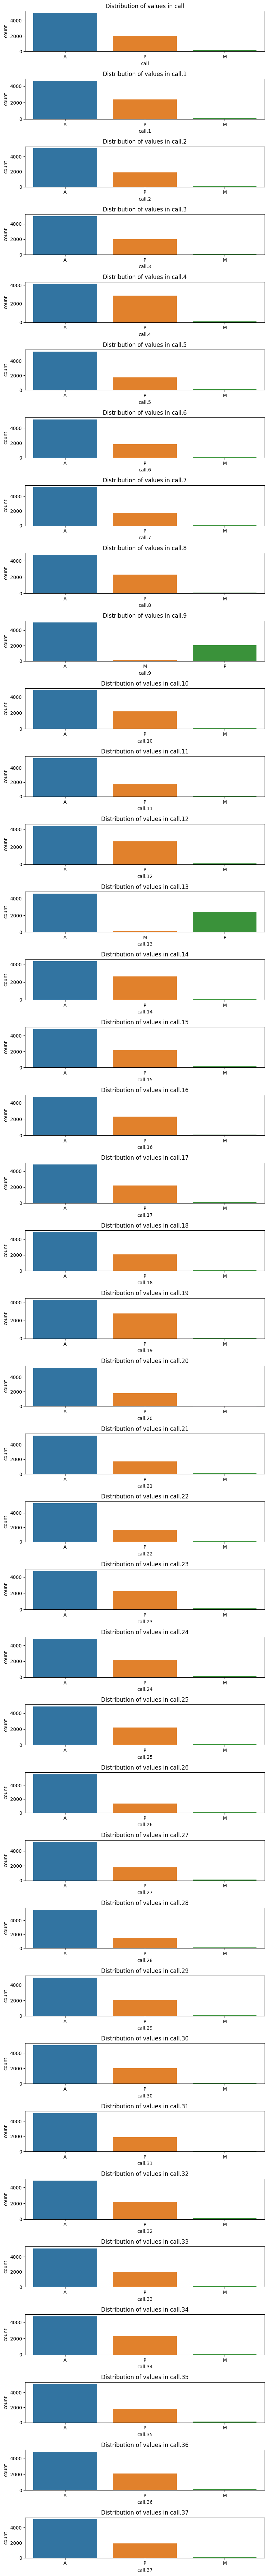

In [ ]:
call_columns = [col for col in data_train.columns if 'call' in col]

# Distribution of 'call' values
fig, axes = plt.subplots(nrows=len(call_columns), figsize=(8, 2*len(call_columns)))
for i, col in enumerate(call_columns):
    sns.countplot(data=data_train, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of values in {col}")

plt.tight_layout()
plt.show()

<Axes: xlabel='cancer', ylabel='count'>

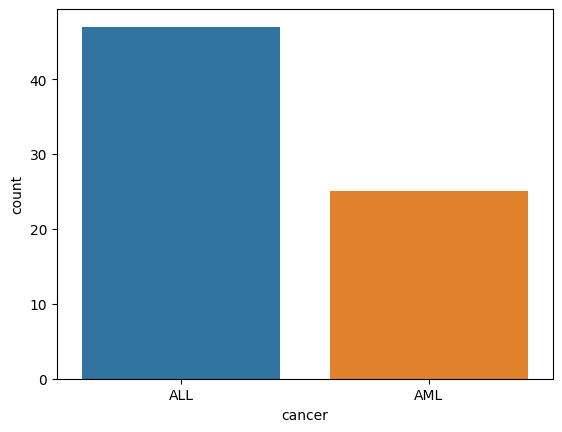

In [ ]:
sns.countplot(data=copy_test,x='cancer')

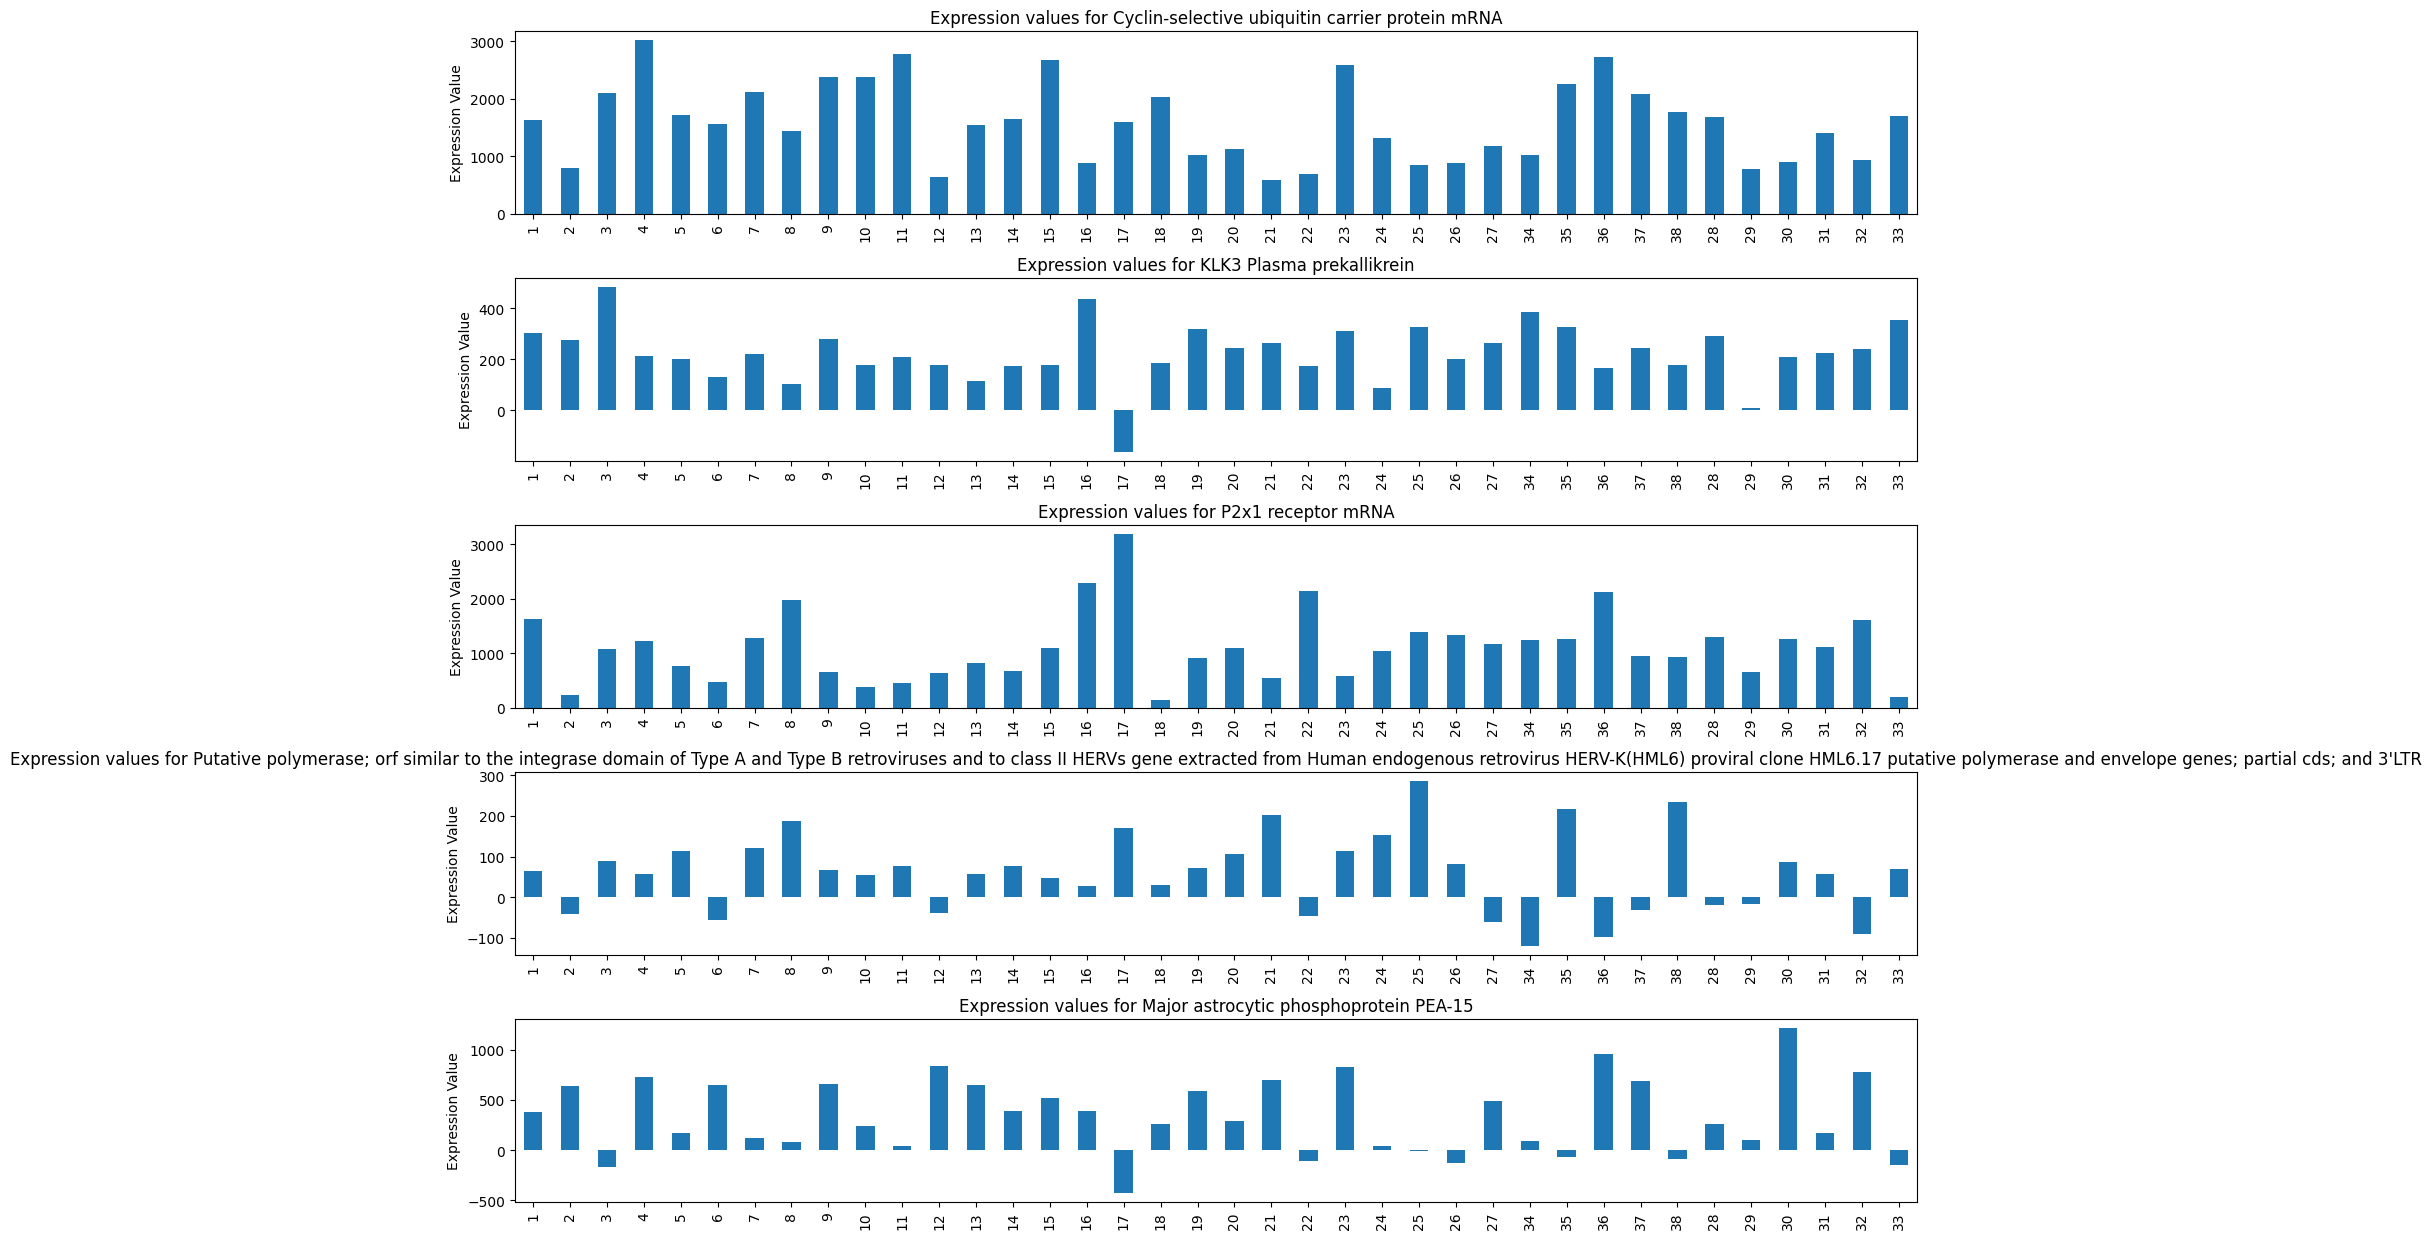

In [ ]:
random_genes = np.random.choice(data_train['Gene Description'], size=5, replace=False)

# Plot the distribution of their expression values across samples
fig, axes = plt.subplots(nrows=len(random_genes), figsize=(15, 2.5*len(random_genes)))

for i, gene in enumerate(random_genes):
    gene_data = data_train[data_train['Gene Description'] == gene].iloc[0][measurement_columns]
    gene_data.plot(ax=axes[i], kind='bar')
    axes[i].set_title(f"Expression values for {gene}")
    axes[i].set_ylabel("Expression Value")

plt.tight_layout()
plt.show()

In [ ]:
data_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [ ]:
data_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In the given problem, we have in total 72 patients and their respective gene expression values for different genes, and also we have the cancer status of each patient.

Out of the 72 patients, 38 are columns in training data and 34 are columns in testing data. We don't need to use '**call**' columns as they are not required in the analysis.

Our Target vector is the '**cancer**' column in the copy_test dataset.


Now, I am removing all the call columns from the dataset and cleaning the training data

# Training Data Preparation

In [ ]:
columns1 = [col for col in data_train.columns if 'call' not in col]

In [ ]:
data_train1 = data_train[columns1]

In [ ]:
data_train1.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [ ]:
data_train1.columns

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [ ]:
new_order = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38']

# Reorder columns
data_train1 = data_train1[new_order]

In [ ]:
data_train1.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,193,312,230,330,337,101,132,318,325,392
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324


In [ ]:
#We have Gene Accession number so we don't need the gene Description column
data_train1.drop('Gene Description',axis=1,inplace=True)

In [ ]:
data_train1.drop('Gene Accession Number',axis=1)

In [ ]:
#I am manipulating the dataset in a such a way that we can get the values of different gene expression for a particular gene as columns for a particular patient
# I have taken transpose of the database in order to achieve the required structure of training data
# I have set the index of the training data as the Gene Accession Number.
data_train1.set_index(data_train1.columns[0]).T

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [ ]:
X_train = data_train1.set_index(data_train1.columns[0]).T

In [ ]:
#I am assigning this to my training set
X_train = data_train1.set_index(data_train1.columns[0]).T
X_train.to_csv('/content/drive/MyDrive/AMLBS_Assignments/data_train_manipulated_X.csv')

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/data_train_manipulated_X.csv')

In [ ]:
 X_train= X_train.rename_axis('Patient')

In [ ]:
X_train

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


Now we can see that the training data is quite well structured with all the necessary columns for a particular patient being visible very clearly

In [ ]:
y_train = copy_test.iloc[0:38,:]

In [ ]:
y_train

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
5,6,ALL
6,7,ALL
7,8,ALL
8,9,ALL
9,10,ALL


# Testing Data Preparation

In [ ]:
data_test

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,A,67,A,893,P,722,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,A,263,A,297,A,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,A,-33,A,6,A,0,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,A,-33,A,1971,P,510,P,...,260,A,1777,P,210,A,284,A,379,A


In [ ]:
columns2 = [col for col in data_test.columns if 'call' not in col]
data_test = data_test[columns2]

In [ ]:
data_test

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,67,893,722,612,1950,245,1235,...,618,507,1372,87,1111,707,423,809,466,551
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,263,297,170,370,906,164,9,...,308,64,642,98,459,354,41,445,349,194
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,-33,6,0,29,79,84,7,...,0,-11,-9,-26,-8,-22,0,-2,0,20
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,-33,1971,510,333,170,100,1545,...,196,198,608,153,73,260,1777,210,284,379


In [ ]:
data_test.columns

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [ ]:
new_order = ['Gene Description', 'Gene Accession Number', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72']

# Reorder columns
data_test1 = data_test[new_order]

In [ ]:
data_test1

,Gene Description,Gene Accession Number,39,40,41,42,43,44,45,46,...,63,64,65,66,67,68,69,70,71,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,-62,22,86,-146,-187,-56,...,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-23,-153,-36,-74,-187,-43,...,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,-7,17,-141,170,312,43,...,-46,-124,-5,63,-153,49,-30,12,23,-50
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,142,276,252,174,142,177,...,146,431,141,95,237,180,68,129,146,211
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-233,-211,-201,-32,114,-116,...,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,67,245,893,1235,354,304,625,...,809,466,707,423,441,524,742,320,348,874
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,263,164,297,9,-42,-1,173,...,445,349,354,41,99,249,234,174,208,393
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,-33,84,6,7,-100,-207,63,...,-2,0,-22,0,-8,40,72,-4,0,34
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,-33,100,1971,1545,45,112,63,...,210,284,260,1777,80,-68,109,176,74,237


In [ ]:
#We have Gene Accession number so we don't need the gene Description column
data_test1.drop('Gene Description',axis=1,inplace=True)

<ipython-input-25-950f13cd8c70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test1.drop('Gene Description',axis=1,inplace=True)


In [ ]:
#I am manipulating the dataset in a such a way that we can get the values of different gene expression for a particular gene as columns for a particular patient
# I have taken transpose of the database in order to achieve the required structure of training data
# I have set the index of the training data as the Gene Accession Number.
data_test1.set_index(data_test1.columns[0]).T

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190
46,-56,-43,43,177,-116,-184,-105,-62,0,-40,...,103,593,0,-24,18,625,173,63,63,-62
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [ ]:
#Now I have got the testing data with other 34 patients and their respective gene expression values in form of their Gene Accession Number
#This dataset can now be used as the testing data

In [ ]:
X_test=data_test1.set_index(data_test1.columns[0]).T

In [ ]:
X_test
X_test.to_csv('/content/drive/MyDrive/AMLBS_Assignments/data_X_test.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-31-ba30be5ec08e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.concatenate(X_train.values), ax=ax[0]).set_title('Original Data')
<ipython-input-31-ba30be5ec08e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Scaled Data'

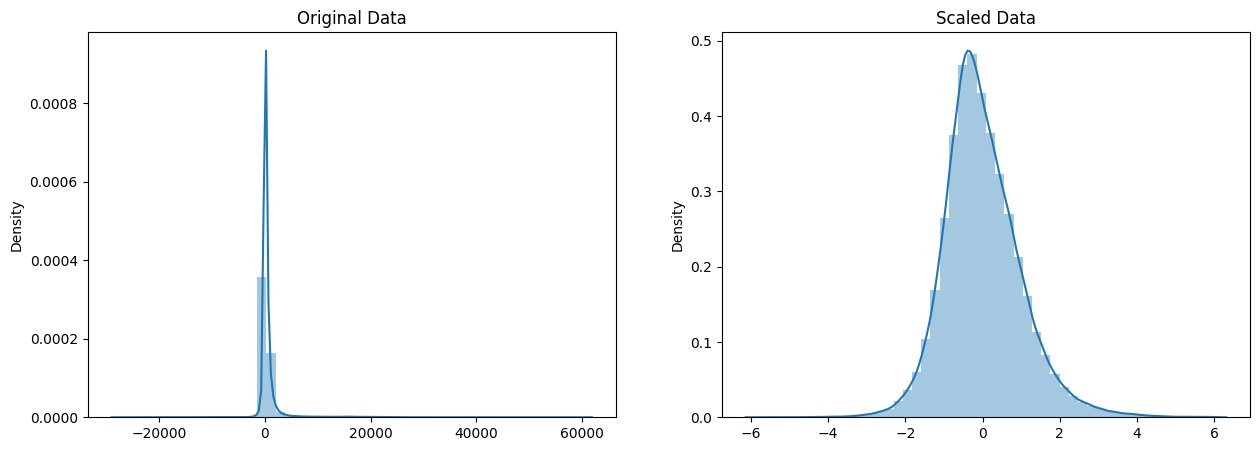

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot(np.concatenate(X_train.values), ax=ax[0]).set_title('Original Data')
sns.distplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Scaled Data')
plt.tight_layout
plt.show()

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)

(38, 32)
(34, 32)


In [ ]:
y_train = copy_test['cancer'][:38]
y_test = copy_test['cancer'][38:]

In [ ]:
y_train

0     ALL
1     ALL
2     ALL
3     ALL
4     ALL
5     ALL
6     ALL
7     ALL
8     ALL
9     ALL
10    ALL
11    ALL
12    ALL
13    ALL
14    ALL
15    ALL
16    ALL
17    ALL
18    ALL
19    ALL
20    ALL
21    ALL
22    ALL
23    ALL
24    ALL
25    ALL
26    ALL
27    AML
28    AML
29    AML
30    AML
31    AML
32    AML
33    AML
34    AML
35    AML
36    AML
37    AML
Name: cancer, dtype: object

# Visualizations on Training Data

In [96]:
data = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/data_train_manipulated_X.csv')


In [97]:
transposed_data = data.drop(columns=["Unnamed: 0"]).transpose()

# Rename the columns for clarity
transposed_data.columns = [f"Patient_{i+1}" for i in range(transposed_data.shape[1])]

# Display the first few rows of the transposed data
transposed_data.head()

,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_29,Patient_30,Patient_31,Patient_32,Patient_33,Patient_34,Patient_35,Patient_36,Patient_37,Patient_38
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,...,2,-95,49,-37,-70,-50,-57,136,124,-1
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,...,193,312,230,330,337,101,132,318,325,392
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324


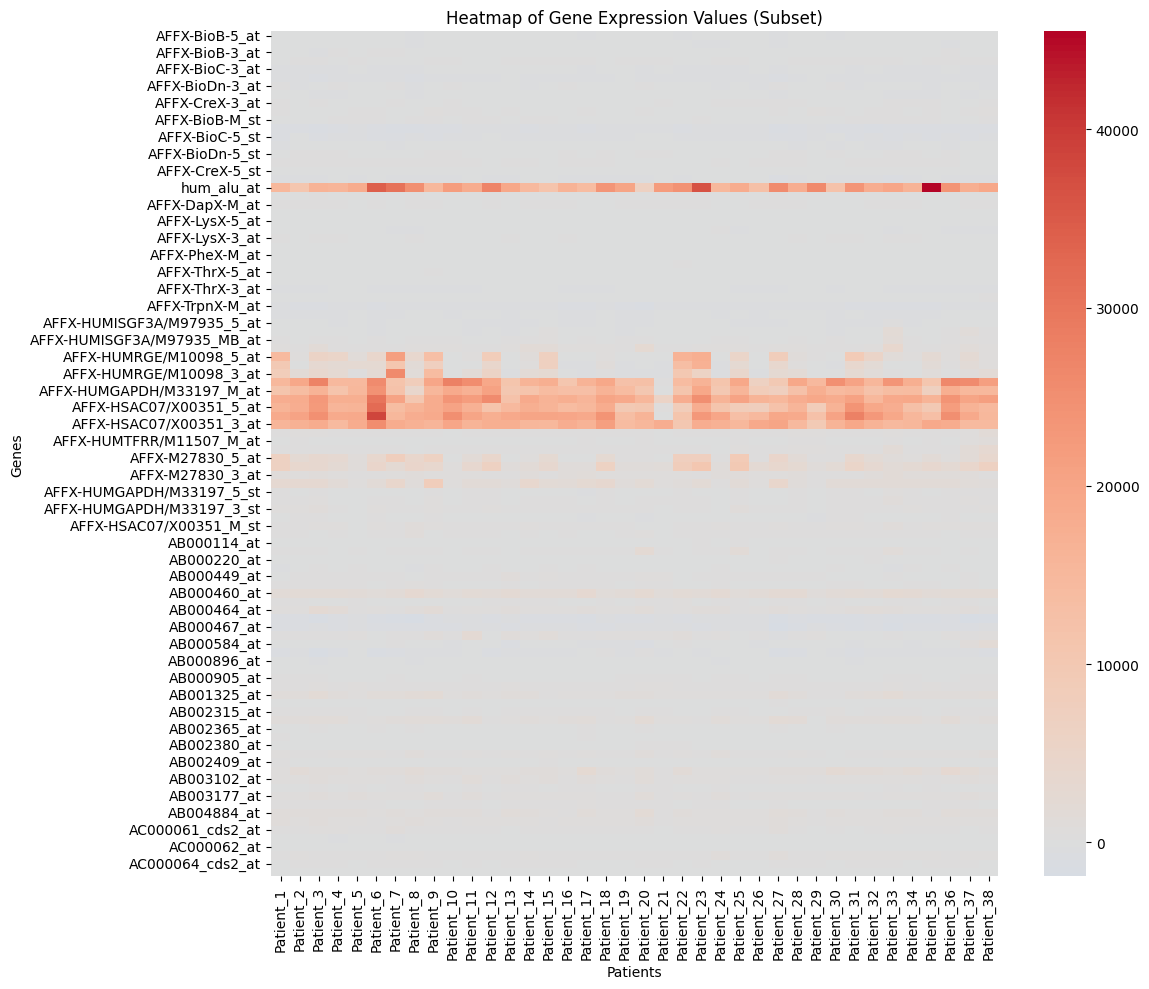

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a heatmap of the transposed data (subset for visualization clarity)
plt.figure(figsize=(12, 10))
sns.heatmap(transposed_data.iloc[:100, :], cmap="coolwarm", center=0)
plt.title("Heatmap of Gene Expression Values (Subset)")
plt.ylabel("Genes")
plt.xlabel("Patients")
plt.tight_layout()
plt.show()


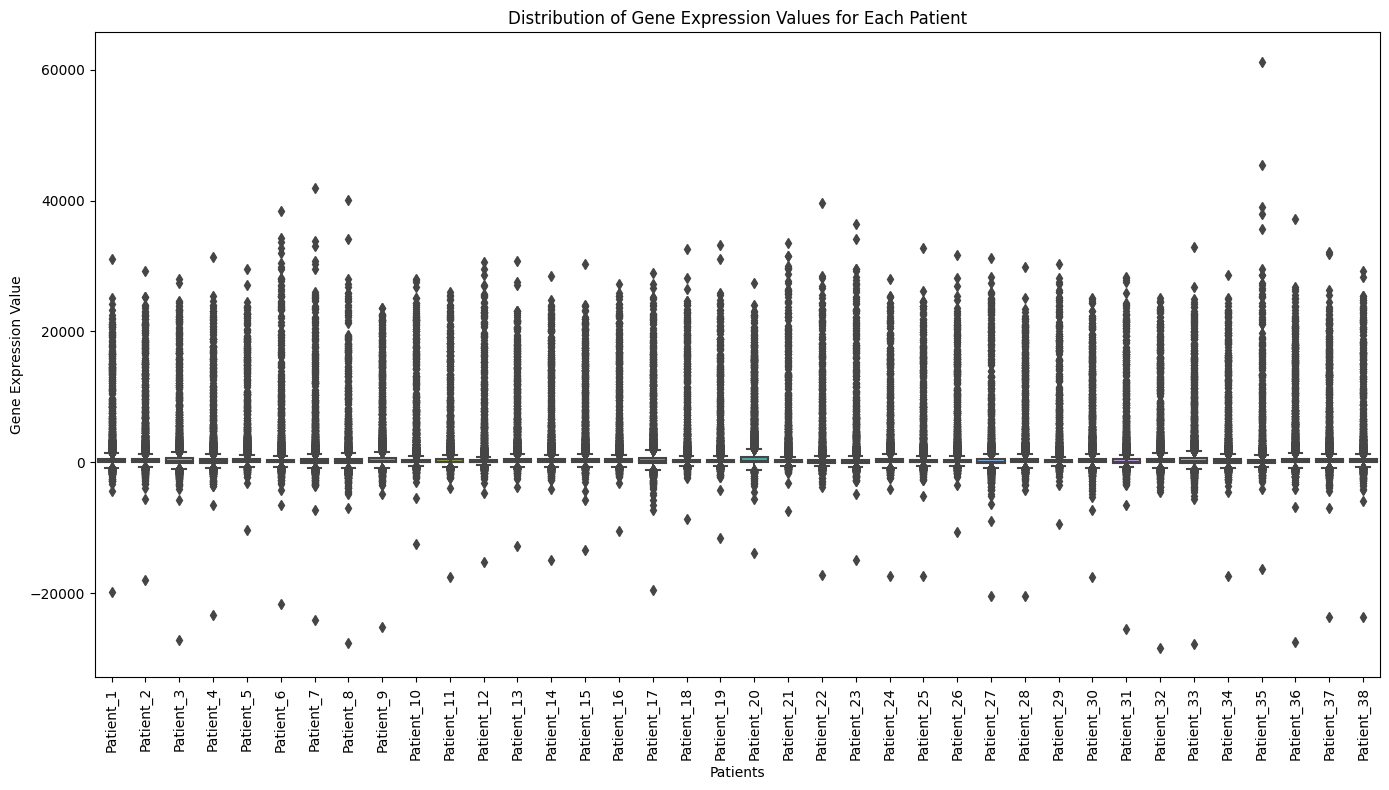

In [99]:
# Plotting a boxplot of the gene expression values for each patient
plt.figure(figsize=(14, 8))
sns.boxplot(data=transposed_data)
plt.title("Distribution of Gene Expression Values for Each Patient")
plt.ylabel("Gene Expression Value")
plt.xlabel("Patients")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


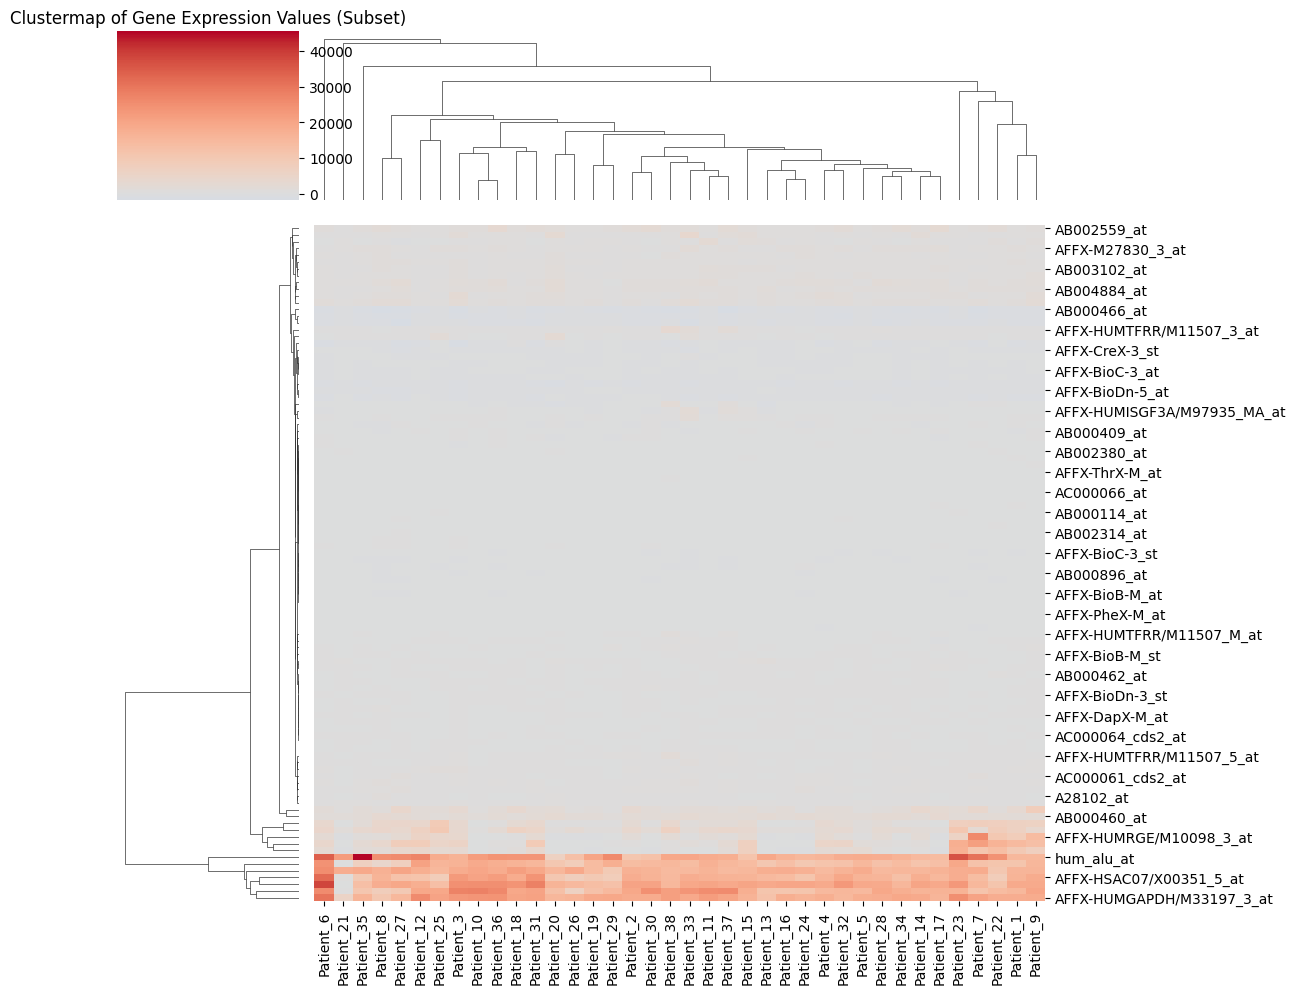

In [100]:
# Plotting a clustermap of the transposed data (subset for visualization clarity)
sns.clustermap(transposed_data.iloc[:100, :], cmap="coolwarm", center=0, figsize=(12, 10))
plt.title("Clustermap of Gene Expression Values (Subset)")
plt.tight_layout()
plt.show()


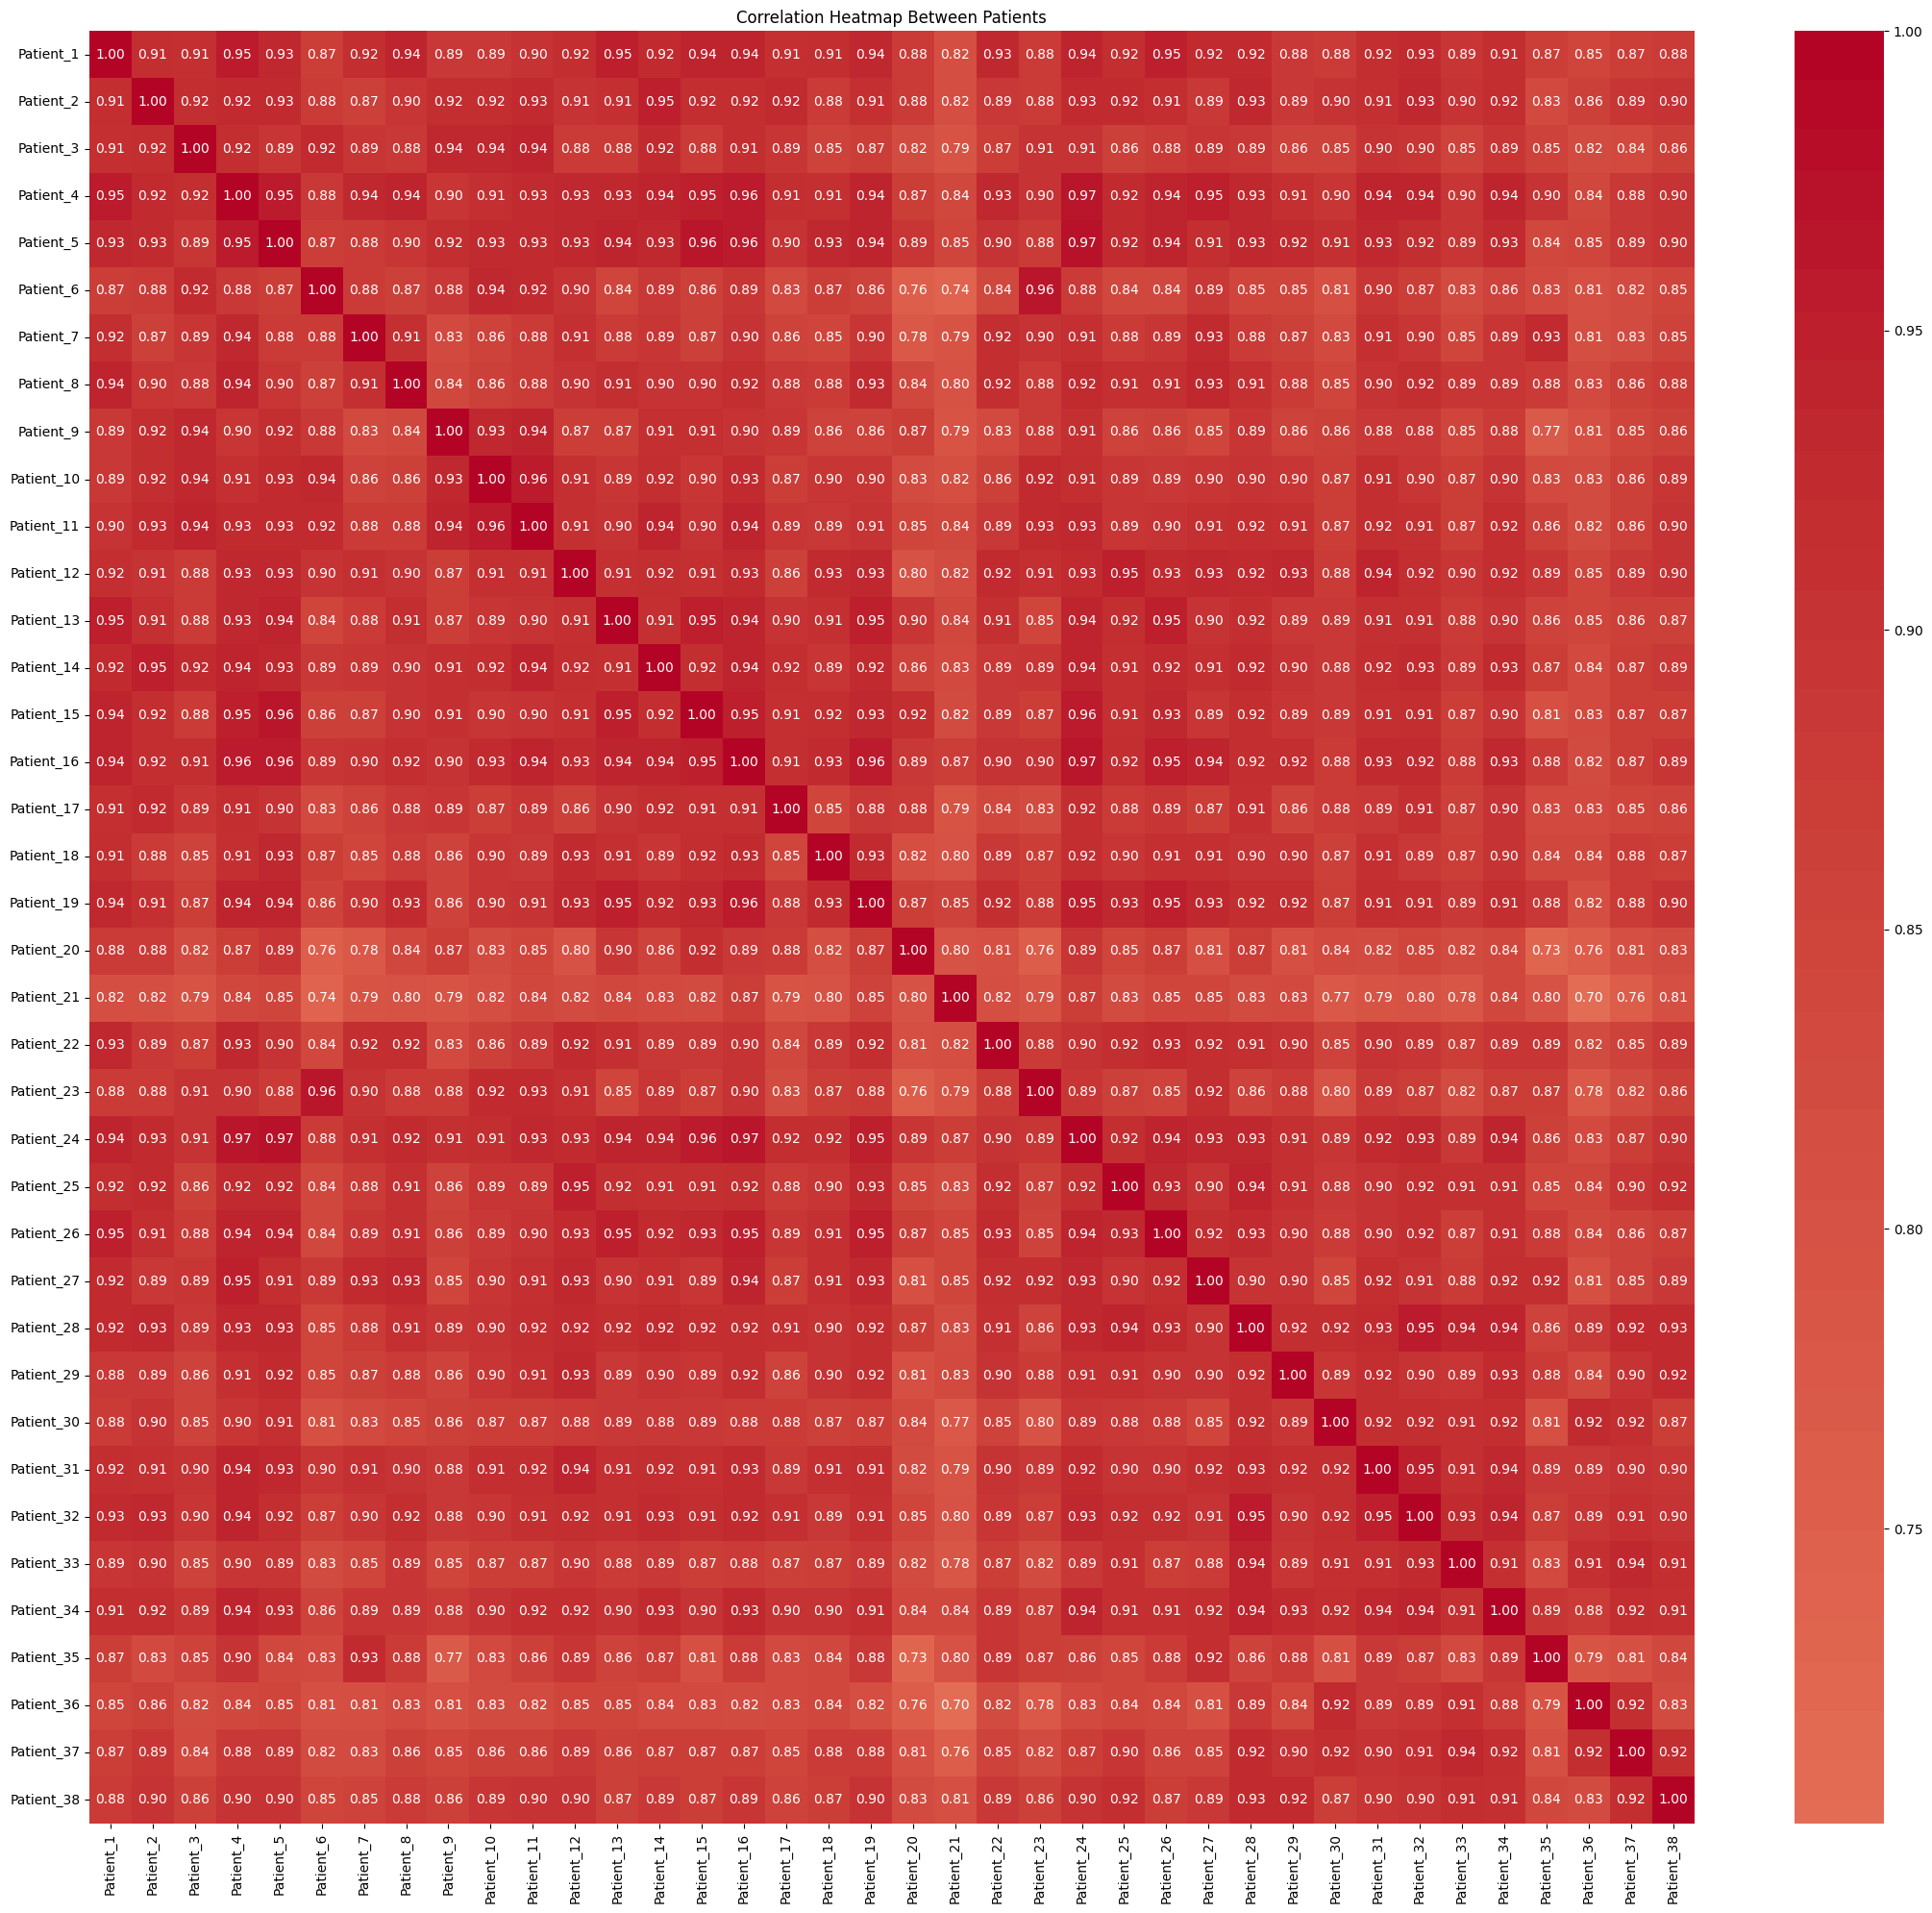

In [104]:
# Compute the correlation matrix between patients based on their gene expression profiles
correlation_matrix = transposed_data.corr()

# Plot a correlation heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap Between Patients")
plt.tight_layout()
plt.show()


28 features explain around 90% of the variance. From 7129 features to 28


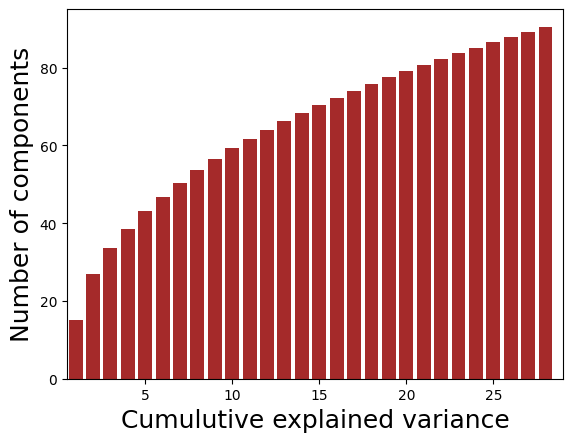

In [ ]:
pca = PCA()
pca.fit_transform(X_train_scaled)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance / total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
print(k, " features explain around 90% of the variance. From 7129 features to ", k, sep='')

pca = PCA(n_components=k)
X_train_pca = pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(1, k + 1), var_exp, color="brown")
plt.xlabel("Cumulutive explained variance", fontsize=18)
plt.ylabel("Number of components", fontsize=18)
plt.xlim((0.5, k + 1))
plt.show()

### Model Training

# SVM(Support Vector Machine) Analysis:

**Support Vector Machines** are widely used in cancer type prediction due to their ability to handle high-dimensional genomic data effectively. In the context of cancer research:

**Feature Selection**: Genomic data often involves thousands of genes or features. SVMs can identify the most relevant genes (features) for cancer prediction, aiding in feature selection and reducing the dimensionality of the data.

**Kernel Trick**: SVMs use kernel functions like radial basis function (RBF) to transform the data into higher-dimensional spaces, enabling the model to capture complex relationships among genes. This is crucial in understanding the intricate genetic patterns associated with different cancer types.

**Binary Classification**: SVMs are inherently binary classifiers. In cancer research, where distinguishing between cancer and non-cancer samples is vital, SVMs can effectively classify samples into two classes, making them valuable tools for tumor detection.

SVMs use kernels to transform data into ***higher-dimensional*** spaces. Different kernels serve various purposes:

**Linear Kernel**: Suitable for linearly separable data. It works well when the relationship between features and classes is approximately linear.

**Radial Basis Function (RBF) Kernel**: Also known as Gaussian kernel, it is effective for capturing complex, non-linear relationships. RBF kernel is commonly used in genomics due to its ability to handle intricate patterns in high-dimensional data.

**Polynomial Kernel**: Useful for capturing polynomial relationships in the data. It can be effective when the decision boundary is curved.

**Sigmoid Kernel**: Sigmoid kernel can be used when the data has a sigmoid (S-shaped) relationship. However, it's used less frequently compared to linear, RBF, and polynomial kernels.

Choosing the appropriate kernel is crucial. We need to experiment with different kernels to find the one that best fits the underlying patterns in the genomic data, leading to more accurate cancer type predictions.

In [ ]:
#SVM Code
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
linear_predictions = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Linear Kernel SVM Accuracy:", linear_accuracy)

Linear Kernel SVM Accuracy: 0.9705882352941176


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# X_train, y_train, X_test, y_test are your training and testing data
# X_train and X_test have columns representing gene expression values for different patients

# Flatten the target variable using ravel()

y_train_flattened = y_train.values.ravel()
y_test_flattened = y_test.values.ravel()

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train_flattened)
linear_predictions = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test_flattened, linear_predictions)
print("Linear Kernel SVM Accuracy:", linear_accuracy)

# SVM with RBF Kernel

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train_flattened)
rbf_predictions = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test_flattened, rbf_predictions)
print("RBF Kernel SVM Accuracy:", rbf_accuracy)

# SVM with Polynomial Kernel

svm_poly = SVC(kernel='poly', degree=13)
svm_poly.fit(X_train, y_train_flattened)
poly_predictions = svm_poly.predict(X_test)
poly_accuracy = accuracy_score(y_test_flattened, poly_predictions)
print("Polynomial Kernel SVM Accuracy:", poly_accuracy)


Linear Kernel SVM Accuracy: 0.9705882352941176
RBF Kernel SVM Accuracy: 0.6176470588235294
Polynomial Kernel SVM Accuracy: 0.9411764705882353


In [ ]:
svm_poly = SVC(kernel='poly', degree=15)
svm_poly.fit(X_train, y_train_flattened)
poly_predictions = svm_poly.predict(X_test)
poly_accuracy = accuracy_score(y_test_flattened, poly_predictions)
print("Polynomial Kernel SVM Accuracy:", poly_accuracy)

Polynomial Kernel SVM Accuracy: 0.9117647058823529


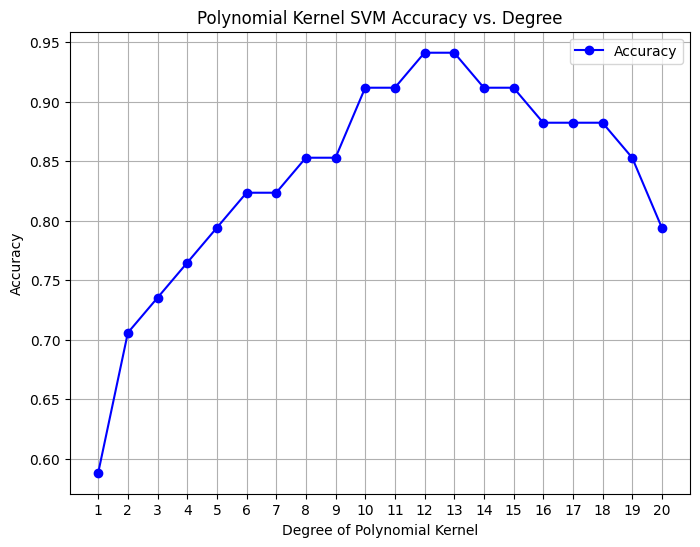

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

degrees = np.arange(1, 21)  # Testing degrees from 1 to 20

# Lists to store accuracy values
accuracies = []

# Iterating through different degrees and train SVM models
for degree in degrees:
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_train, y_train.values.ravel())
    poly_predictions = svm_poly.predict(X_test)
    accuracy = accuracy_score(y_test.values.ravel(), poly_predictions)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(degrees, accuracies, marker='o', color='b', label='Accuracy')
plt.title('Polynomial Kernel SVM Accuracy vs. Degree')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()


As we can observe from the above graph that the accuracy is maximum when the degree of polynomial kernel is 12 or 13.
So, we will take that value for our consideration

In [ ]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train_flattened)
linear_predictions = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test_flattened, linear_predictions)
print("Linear Kernel SVM Accuracy:", linear_accuracy)

# SVM with RBF Kernel

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train_flattened)
rbf_predictions = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test_flattened, rbf_predictions)
print("RBF Kernel SVM Accuracy:", rbf_accuracy)

# SVM with Polynomial Kernel

svm_poly = SVC(kernel='poly', degree=13)
svm_poly.fit(X_train, y_train_flattened)
poly_predictions = svm_poly.predict(X_test)
poly_accuracy = accuracy_score(y_test_flattened, poly_predictions)
print("Polynomial Kernel SVM Accuracy:", poly_accuracy)


Linear Kernel SVM Accuracy: 0.9705882352941176
RBF Kernel SVM Accuracy: 0.6176470588235294
Polynomial Kernel SVM Accuracy: 0.9411764705882353



Classification report :
               precision    recall  f1-score   support

         ALL       1.00      0.95      0.97        20
         AML       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



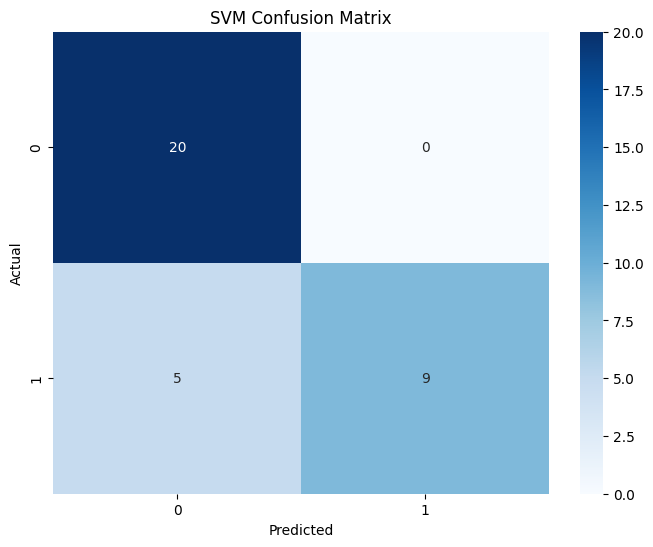

In [105]:
cm_svm = confusion_matrix(y_test.values.ravel(), linear_predictions)
print ("\nClassification report :\n", metrics.classification_report(y_test, linear_predictions))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

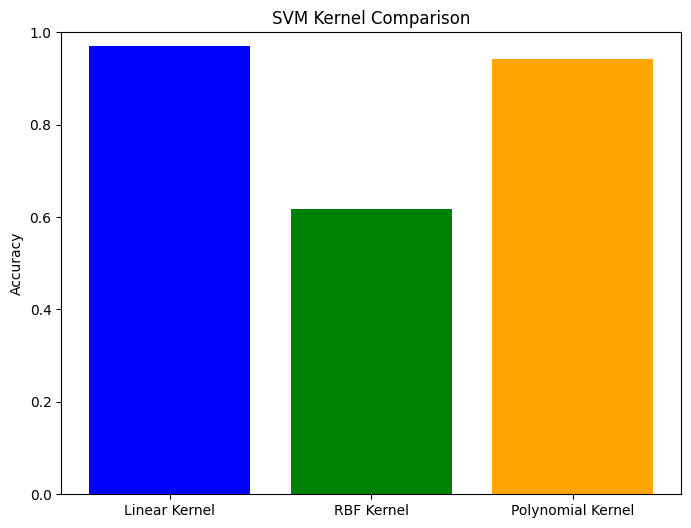

In [ ]:
labels = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel']
accuracies = [linear_accuracy, rbf_accuracy, poly_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy values
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison')
plt.show()

# Random Forest Analysis

**Random Forest's Role in Cancer Type Prediction:**

Random Forests play a vital role in cancer type prediction due to their ability to analyze complex and high-dimensional genomic data. In the context of cancer research:

**Handling High-Dimensional Data**: Genomic data often consists of thousands of genes, which Random Forests handle well, identifying patterns and relationships that contribute to cancer types.

**Ensemble Learning**: By combining multiple decision trees, Random Forests improve accuracy and generalize better to unseen data, crucial when dealing with the diverse and evolving nature of cancer datasets.

**Feature Importance**: Random Forests rank genes based on their importance in predicting cancer types. Researchers can focus on these genes, potentially discovering novel biomarkers and therapeutic targets.

Handling Noisy Data: Genomic data can be noisy and contain outliers. Random Forests are robust to such noise, providing reliable predictions even with imperfect data.

In [ ]:
y_train = copy_test['cancer'][:38]
y_test = copy_test['cancer'][38:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and testing data
# X_train and X_test have columns representing gene expression values for different patients


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train.values.ravel())


rf_predictions = rf_classifier.predict(X_test)


rf_accuracy = accuracy_score(y_test.values.ravel(), rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8529411764705882


HyperParameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV with the specified parameter grid and cross-validation folds
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
rf_predictions = best_rf_classifier.predict(X_test_scaled)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test.values.ravel(), rf_predictions)
print("Random Forest Accuracy (after hyperparameter tuning):", rf_accuracy)
print("Best Hyperparameters:", best_params)


Random Forest Accuracy (after hyperparameter tuning): 0.8529411764705882
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



Classification report :
               precision    recall  f1-score   support

         ALL       0.80      1.00      0.89        20
         AML       1.00      0.64      0.78        14

    accuracy                           0.85        34
   macro avg       0.90      0.82      0.84        34
weighted avg       0.88      0.85      0.85        34



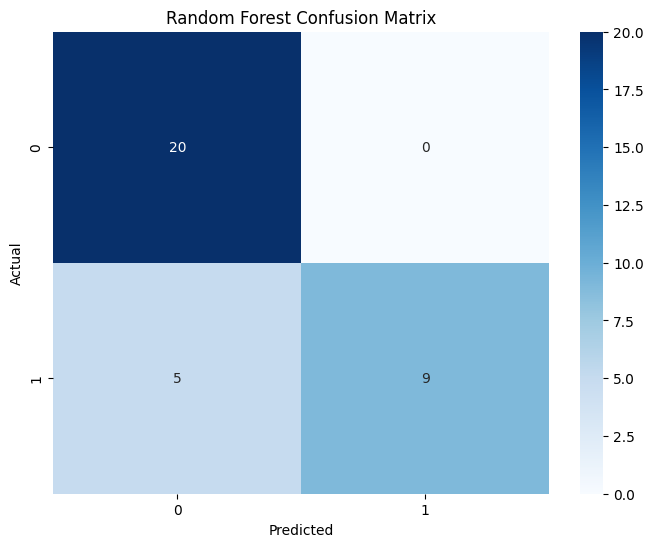

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns

# Compute confusion matrix for Random Forest predictions
cm_rf = confusion_matrix(y_test.values.ravel(), rf_predictions)
print ("\nClassification report :\n", metrics.classification_report(y_test, rf_predictions))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Neural Network Regression

In [ ]:
y_test

38    ALL
39    ALL
40    ALL
41    ALL
42    ALL
43    ALL
44    ALL
45    ALL
46    ALL
47    ALL
48    ALL
49    AML
50    AML
51    AML
52    AML
53    AML
54    ALL
55    ALL
56    AML
57    AML
58    ALL
59    AML
60    AML
61    AML
62    AML
63    AML
64    AML
65    AML
66    ALL
67    ALL
68    ALL
69    ALL
70    ALL
71    ALL
Name: cancer, dtype: object

In [ ]:
y_train

0     ALL
1     ALL
2     ALL
3     ALL
4     ALL
5     ALL
6     ALL
7     ALL
8     ALL
9     ALL
10    ALL
11    ALL
12    ALL
13    ALL
14    ALL
15    ALL
16    ALL
17    ALL
18    ALL
19    ALL
20    ALL
21    ALL
22    ALL
23    ALL
24    ALL
25    ALL
26    ALL
27    AML
28    AML
29    AML
30    AML
31    AML
32    AML
33    AML
34    AML
35    AML
36    AML
37    AML
Name: cancer, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Fit and transform the categorical column
y_train= label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
y_train
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Assuming X_train, X_test, y_train, and y_test are your dataframes or arrays

# Define the shape of your input data
input_shape = X_train.shape[1]  # Replace with the number of features in your gene expression data

# Build a different neural network model
NN_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
NN_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.005,
    restore_best_weights=True
)

# Train the model
train_history = NN_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping]
)


Epoch 1/100
3/3 [==============================] - 2s 209ms/step - loss: 1267.6257 - accuracy: 0.6316 - val_loss: 325.9643 - val_accuracy: 0.5882
Epoch 2/100
3/3 [==============================] - 0s 50ms/step - loss: 932.6237 - accuracy: 0.6053 - val_loss: 271.0994 - val_accuracy: 0.5294
Epoch 3/100
3/3 [==============================] - 0s 40ms/step - loss: 841.6714 - accuracy: 0.5526 - val_loss: 37.1835 - val_accuracy: 0.8529
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 210.7326 - accuracy: 0.8421 - val_loss: 558.5500 - val_accuracy: 0.5882
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 338.8883 - accuracy: 0.6579 - val_loss: 106.4701 - val_accuracy: 0.6176
Epoch 6/100
3/3 [==============================] - 0s 44ms/step - loss: 304.3494 - accuracy: 0.6053 - val_loss: 28.6590 - val_accuracy: 0.9118
Epoch 7/100
3/3 [==============================] - 0s 41ms/step - loss: 180.3238 - accuracy: 0.7105 - val_loss: 49.1661 - val_accuracy: 

2/2 [==============================] - 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



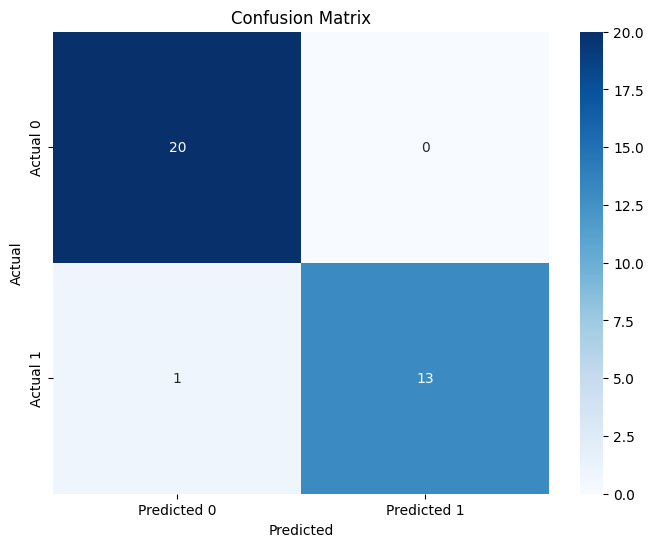

In [ ]:
predicted_probs = NN_model.predict(X_test)

# Apply threshold to get binary predictions
predicted_classes = (predicted_probs > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, predicted_classes)

from sklearn.metrics import classification_report, confusion_matrix
# Generate classification report
print("Classification Report:\n", classification_report(y_test, predicted_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Comparison of three models ( Random Forest, SVM and Neural Network )

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Random Forest','Neural Network'],

    'Score': [linear_accuracy, rf_accuracy, nn_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.970588
2,Neural Network,0.970588
1,Random Forest,0.852941


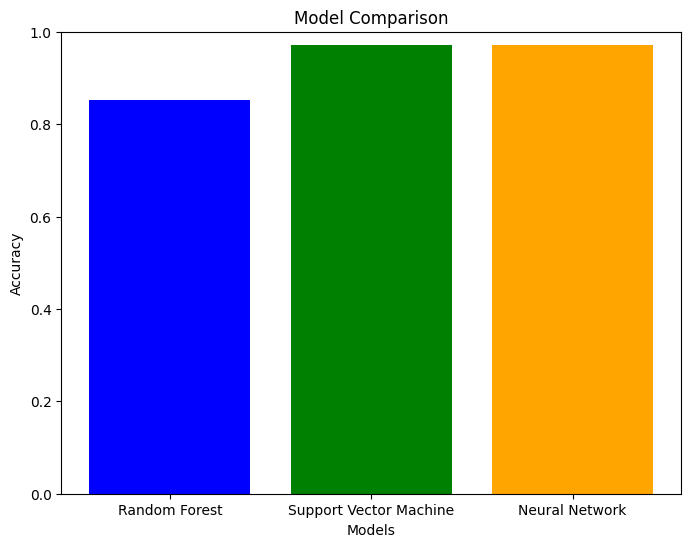

In [ ]:
models = ['Random Forest', 'Support Vector Machine', 'Neural Network']
accuracies = [rf_accuracy, linear_accuracy, nn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1
plt.show()